## Условие 1: Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### 1.1. Скачать следующие данные: kc-house-data

In [7]:
df = pd.read_csv('kc_house_data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1.2. Изучите стоимости недвижимости

In [8]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [9]:
df["price"].min(), df["price"].max()

(75000.0, 7700000.0)

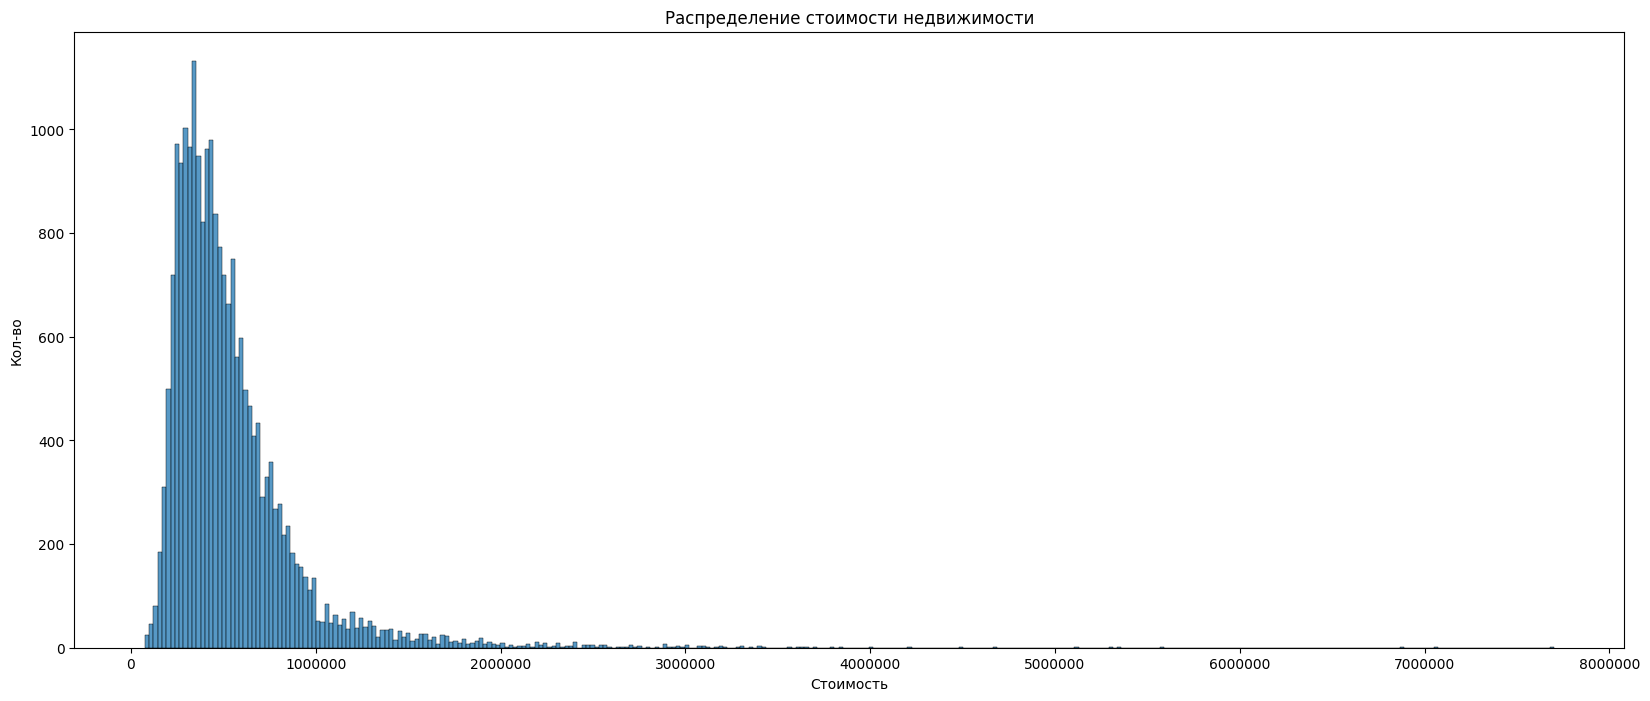

In [10]:
plt.figure(figsize=(20, 8))
sns.histplot(df['price'])
plt.ticklabel_format(style='plain')
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

### 1.3. Изучите распределение квадратуры жилой

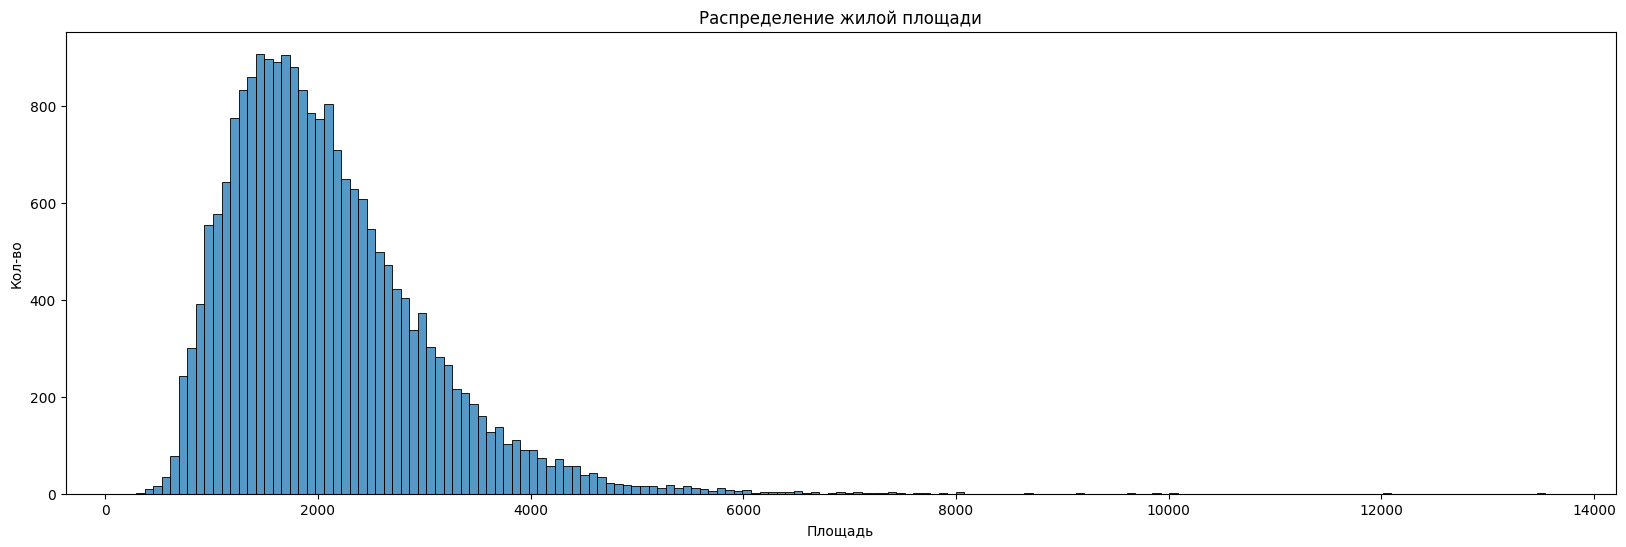

In [11]:
plt.figure(figsize=(20, 6))
sns.histplot(df['sqft_living'])
plt.ticklabel_format(style='plain')
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Кол-во');

### 1.4. Изучите распределение года постройки

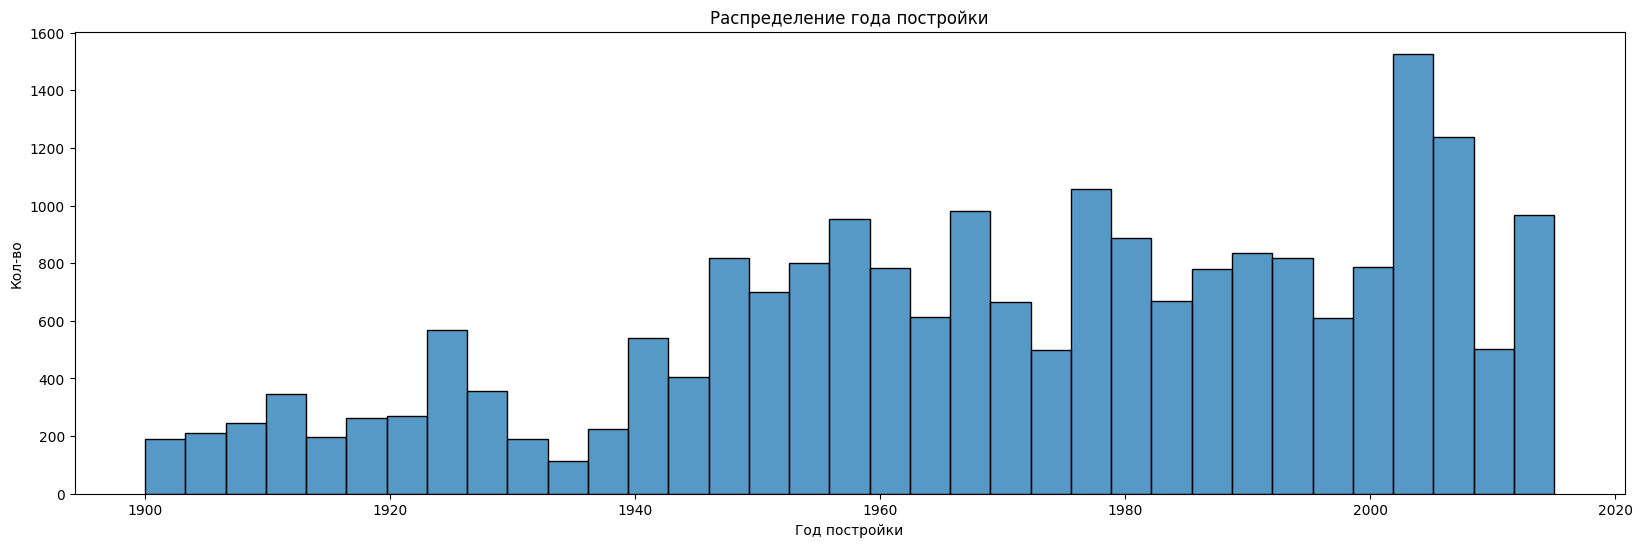

In [12]:
plt.figure(figsize=(20, 6))
sns.histplot(df['yr_built'])
plt.ticklabel_format(style='plain')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

## Условие 2: 2 задача

### 2.1. Изучите распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы

In [13]:
df_w = df['waterfront'].value_counts()
df_w

waterfront
0    21450
1      163
Name: count, dtype: int64

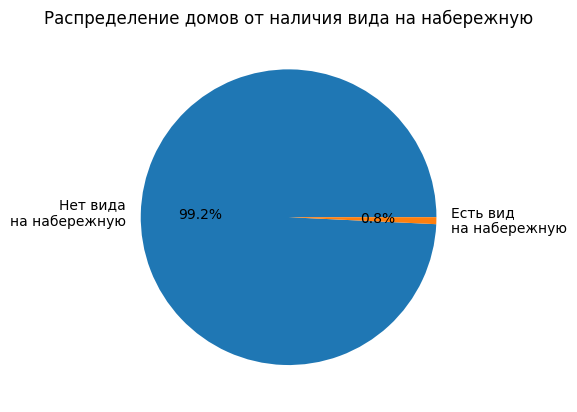

In [19]:
plt.pie(df_w, autopct='%1.1f%%', labels=['Нет вида\nна набережную', 'Есть вид\nна набережную'])
plt.title('Распределение домов от наличия вида на набережную');

In [20]:
print(f'Средняя стоимость жилья с видом на набережную {df[df["waterfront"] == 1]["price"].mean().round(2)}\nСредняя стоимость жилья без вида на набережную {df[df["waterfront"] == 0]["price"].mean().round(2)}')

Средняя стоимость жилья с видом на набережную 1661876.02
Средняя стоимость жилья без вида на набережную 531563.6


### 2.2. Изучите распределение этажей домов

In [21]:
df_fl = df['floors'].value_counts()
df_fl

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

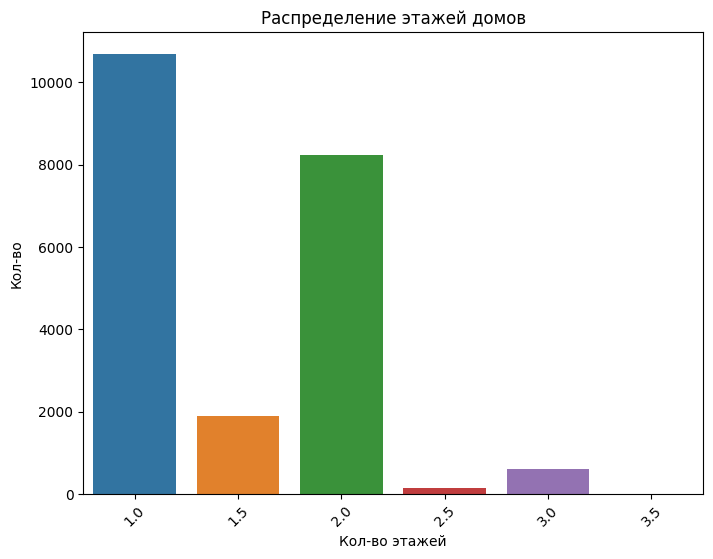

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x = df_fl.index, y = df_fl)
plt.title('Распределение этажей домов')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во')
plt.xticks(rotation=45);

### 2.3. Изучите распределение состояния домов

In [23]:
df_con = df['condition'].value_counts()
df_con

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

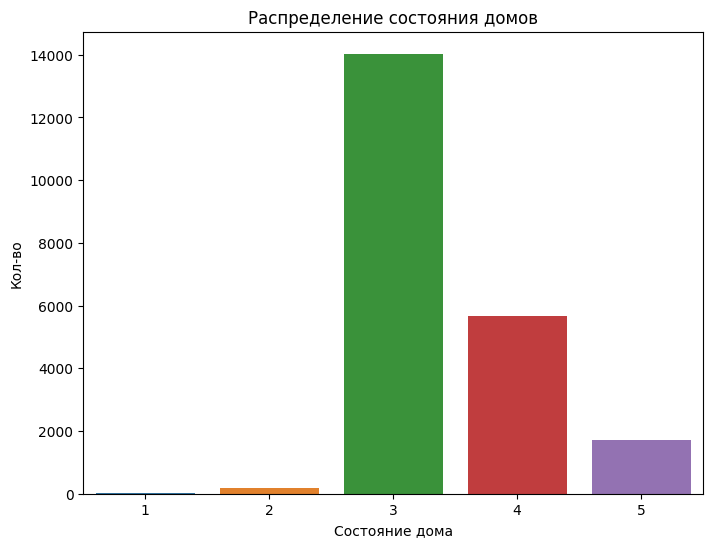

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x = df_con.index, y = df_con)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во');

## Условие 3: 3 задача

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
* Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

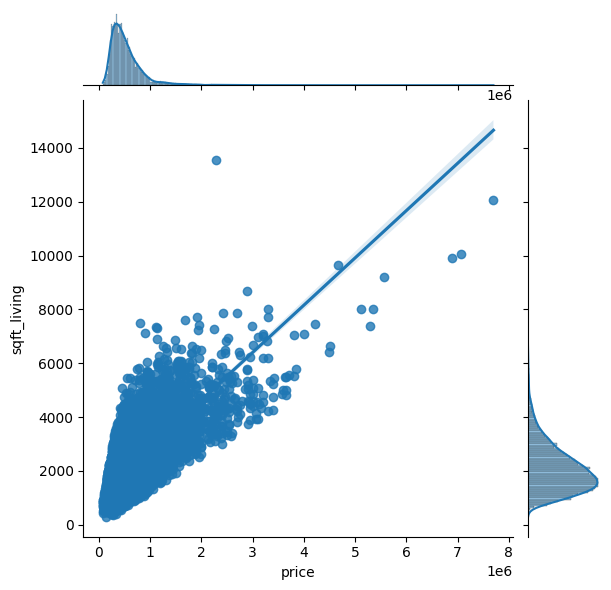

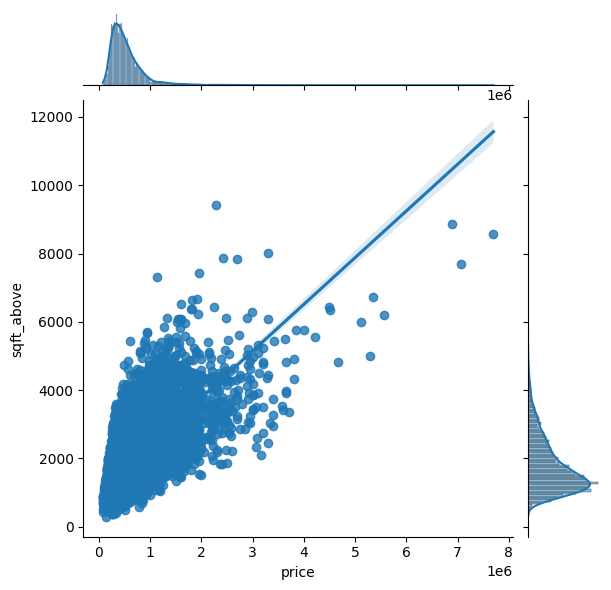

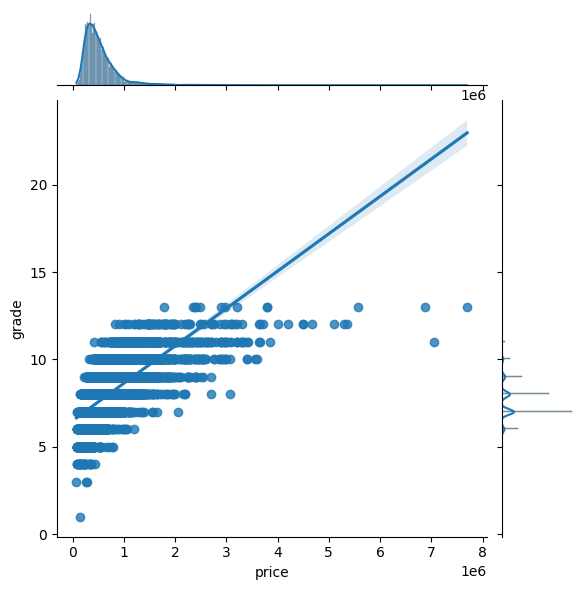

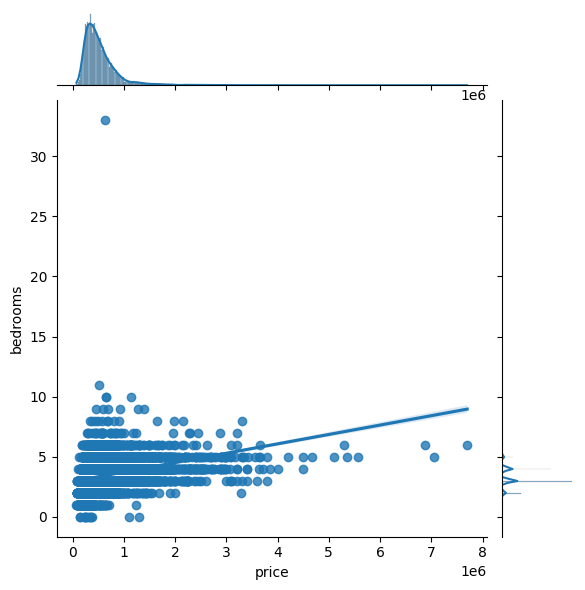

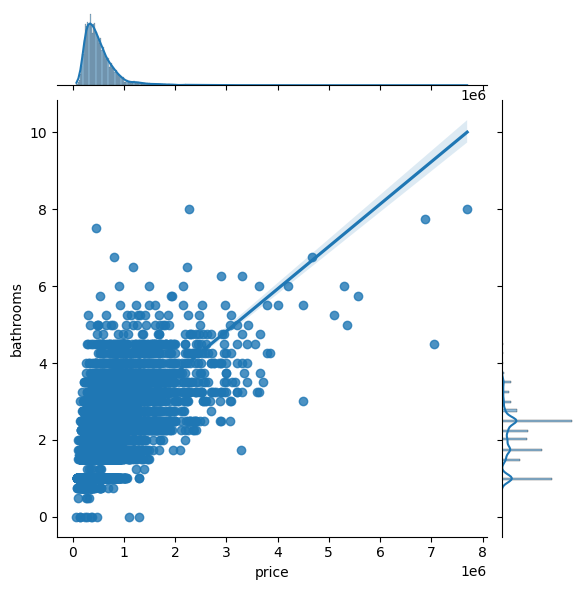

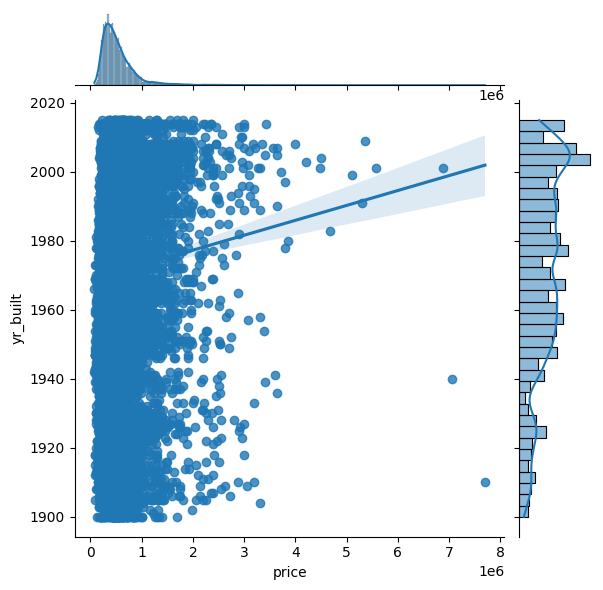

In [25]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg') 
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg')
sns.jointplot(x=df['price'], y=df['grade'], kind='reg')
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg')
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg')
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg');

### Вывод: 
#### Основные показатели влияющие на цену недвижемости:
* площадь жилых помещений
* общая площадь
* высокий уровень качества и дизайна строительства
* количество санузлов
